# 18.06 pset 8

Due Wednesday Oct. 31 at 10:55am.

## Problem 1

In class, we showed that the pseudoinverse $A^+ = V \Sigma^{-1} U^T$ gives the minimum-norm least-squares solution $\hat{x} = A^+ b$.

Suppose that $A$ is an $m\times n$ matrix with full column rank.  In this case, $V$ is a .......... matrix.

By plugging in the SVD $A = U \Sigma V^T$ (and keeping in mind the *shapes* of the matrices), show explicitly in this case that
$$
A^+ = (A^T A)^{-1} A^T
$$
Check your answer with Julia on a random 5×3 matrix:

In [1]:
A = rand(5,3) # 5×3 matrix with rank 3
A⁺ = pinv(A) # the pseudoinverse A⁺ calculated via the SVD

3×5 Array{Float64,2}:
  1.20966    -0.68991   0.0256932  -1.5421     1.00941 
  0.0502937   0.875079  0.0320697   0.570602  -0.757628
 -0.849044   -0.229283  0.553389    1.29653    0.34586 

In [2]:
# calculate (AᵀA)⁻¹Aᵀ and check that it matches A⁺ (up to roundoff error)
A'A \ A' ≈ A⁺

true

## Problem 2

Recall the polynomial fitting exercise from the [least-square fitting notebook](http://nbviewer.jupyter.org/github/stevengj/1806/blob/master/lectures/Least-Square%20Fitting.ipynb) in lecture 12.  We saw that one of the things that can go terribly wrong is *overfitting*.  Here, we will use the SVD to help us understand this phenomenon.

In class, we fitted a polynomial of degree $n$ to 50 data points generated from a degree-3 polynomial $1 + 2a + 3a^2 + 4a^3$ plus noise, using the $m \times n$ [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)
$$
A = \begin{pmatrix}
        1 & a_1 & a_1^2 & \cdots a_1^{n-1} \\
        1 & a_2 & a_2^2 & \cdots a_2^{n-1} \\
        1 & a_3 & a_3^2 & \cdots a_3^{n-1} \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & a_m & a_m^2 & \cdots a_m^{n-1} \\
    \end{pmatrix}
$$
and we found that the fit "went crazy" for $n=40$.

The fit coefficients x̂ = 

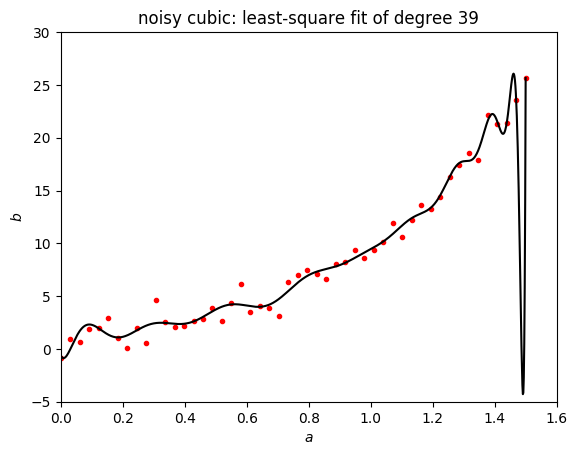

[-0.596354, -64.6851, 4336.45, -66399.5, 4.65043e5, -1.71589e6, 3.29374e6, -2.42658e6, -1.35813e6, 1.99918e6, 1.63497e6, -8.75521e5, -1.98135e6, -8.18188e5, 1.01509e6, 1.73536e6, 9.02709e5, -5.99182e5, -1.52553e6, -1.23324e6, -34763.2, 1.1375e6, 1.42933e6, 6.51362e5, -603752.0, -1.38026e6, -1.0553e6, 1.48858e5, 1.24409e6, 1.21566e6, -25509.7, -1.30525e6, -1.11044e6, 5.96606e5, 1.57467e6, -1.93045e5, -1.87297e6, 1.59543e6, -5.27153e5, 64589.4]


In [3]:
# 50 random points: cubic curve + noise
a = linspace(0,1.5,50)
cubic_curve = 1 + 2a + 3a.^2 + 4a.^3
noise = [-1.85162, -0.0926124, -0.465889, 0.706349, 0.687657, 1.56087, -0.471584, -1.52037, 0.25009, -1.34435, 2.60913, 0.41325, -0.216823, -0.376511, -0.039416, -0.121802, 0.746839, -0.742129, 0.675443, 2.1361, -0.77771, -0.478586, -1.04285, -2.12879, 0.634166, 0.888346, 0.93576, 0.0984751, -0.778859, 0.0655202, -0.274275, 0.335213, -0.98845, -0.825566, -0.694586, 0.463086, -1.60764, -0.698796, -0.0979684, -1.24252, -0.908324, 0.157426, 0.366131, 0.624238, -1.04046, 2.28898, 0.384362, -0.574102, 0.503379, 1.40204] # from randn(length(a))
b = cubic_curve + noise

# naïve least-square fit
n = 40
A = a .^ (0:n-1)'
x̂ = A \ b

# plot the fit
using PyPlot
afine = linspace(0,1.5,1000)
plot(a, b, "r.")
plot(afine, (afine .^ (0:n-1)') * x̂, "k-")
xlabel(L"a")
ylabel(L"b")
xlim(0,1.6)
ylim(-5,30)
title("noisy cubic: least-square fit of degree $(n-1)")

println("The fit coefficients x̂ = ", x̂)

**(a)** Look at the singular values $\sigma_k$ of $A$ using `svdvals(A)`.  

What is the condition number of the matrix?

The matrix $A$ is very ill-conditioned, which means that the columns are *nearly* linearly dependent.  As you add more and more columns to $A$ (that is, as you increase $n$), why are they becoming nearly linearly dependent?  **What vector are the rightmost columns becoming nearly parallel to?**

In [4]:
svdvals(A) # the singular values
cond(A)

2.777830879831007e21

In [5]:
show(STDOUT, "text/plain", svdvals(A)) # print the whole list

40-element Array{Float64,1}:
 

**(b)** Another symptom of the fact that the matrix $A$ is ill-conditioned is that our solution $\hat{x}$ from above had huge components (because $\hat{x} = A^+ b$ divides by $\sigma$ values that are nearly zero).

In consequence, a common technique to cope with overfitting is **ridge regression**, also called a [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) and many other names.   Instead of minimizing $\Vert b - Ax \Vert$, we minimize:
$$
\Vert b - Ay \Vert^2 + \lambda \Vert y \Vert^2
$$
where $\lambda > 0$ is some constant parameter (whose magnitude depends on the amount of noise etcetera), corresponding to a **penalty term** $\lambda \Vert y \Vert^2$ that tries to make $\Vert y \Vert$ small.

Using the solution to [problem 8 of pset 6](http://nbviewer.jupyter.org/github/stevengj/1806/blob/master/psets/pset6sol.ipynb), give an equation for the minimum $\hat{y}$ of the ridge-regularized fitting problem.  It should look very similar to the $A^T A \hat{x} = A^T b$ "normal equations" for ordinary fitting, and should be identical for $\lambda = 0$.

**(c)** Implement Julia code to find $\hat{y}$ by solving your equations from (b), and use the following code plot the fit curve for $\lambda = 1$.  Compare $\Vert \hat{y} \Vert$ to $\Vert \hat{x} \Vert$ to see that the fit coefficients are now much smaller.

   1.10952e7  
    1.65087e5  
 5691.46       
  354.901      
   38.8479     
    9.48916    
    5.21667    
    2.30107    
    0.931682   
    0.350195   
    0.123805   
    0.0414151  
    0.0131555  
    0.0039772  
    0.00114604 
    0.000315016
    8.26263e-5 
    2.06787e-5 
    4.93567e-6 
    1.12263e-6 
    2.4305e-7  
    5.00106e-8 
    9.76048e-9 
    1.80278e-9 
    3.14299e-10
    5.1963e-11 
    1.30452e-11
    6.80039e-12
    3.18261e-12
    1.54606e-12
    9.54485e-13
    7.2138e-13 
    4.2385e-13 
    1.54338e-13
    9.85828e-14
    4.2491e-14 
    3.70989e-14
    1.55599e-14
    7.47272e-15
    3.99418e-15

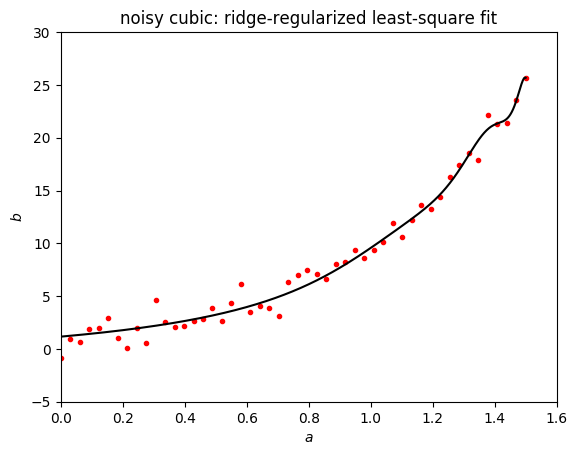

The fit coefficients ŷ = [1.16203, 2.60617, 1.9415, 1.43127, 1.0454, 0.75003, 0.520357, 0.340099, 0.198742, 0.0892972, 0.00687747, -0.0521648, -0.0907718, -0.11153, -0.116913, -0.109461, -0.0918979, -0.0671973, -0.0385843, -0.00945752, 0.0167773, 0.0369692, 0.0485806, 0.0501028, 0.0414936, 0.0244804, 0.00273802, -0.0184645, -0.0330773, -0.0357712, -0.0241681, -0.000832577, 0.0250865, 0.0391123, 0.0277753, -0.0100925, -0.0482518, -0.0307629, 0.063883, -0.0196889]


In [6]:
λ = 1
ŷ = (A'A + λ*eye(40,40)) \ A'b  # ridge-regularized least-square fit

# plot the fit
plot(a, b, "r.")
plot(afine, (afine .^ (0:n-1)') * ŷ, "k-")
xlabel(L"a")
ylabel(L"b")
xlim(0,1.6)
ylim(-5,30)
title("noisy cubic: ridge-regularized least-square fit")

println("The fit coefficients ŷ = ", ŷ)

In [7]:
norm(ŷ) / norm(x̂) # we should have ‖ŷ‖ ≪ ‖x̂‖

4.97554538507529e-7

**(d)** For a full column-rank $m\times n$ matrix with SVD $A = U \Sigma V^T$, write the ridge-regularized solution in a form resembling the pseudoinverse:

$$
\hat{y} = V \, (???) \, U^T b
$$

where $(???)$ is some $n\times n$ matrix in terms of the singular values $\sigma_k$ and the regularization parameter $\lambda$.

Your result should be *equivalent* to the pseudoinverse $A^+$ but with each singular value $\sigma_k$ replaced by ..........., which effectively makes the singular values ...*larger or smaller*... and the condition number ...*larger or smaller*...?

(Your analysis from problem 1 should help, here: plug the SVD into your modified normal equations for $\hat{y}$.)